In [1]:
#importing necesssary packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
os.getcwd()

'C:\\Users\\ASHOK\\Documents\\Learnbay\\Statistics and ML notes\\ML projects'

In [3]:
#importing the dataset
df=pd.read_csv('Dummy Data HSS.csv')
df.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


# EDA

In [4]:
df.shape

(4572, 5)

In [5]:
df.describe()

,TV,Radio,Social Media,Sales
count,4562.000000,4568.000000,4566.000000,4566.000000
mean,54.066857,18.160356,3.323956,192.466602
std,26.125054,9.676958,2.212670,93.133092
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.525957,1.527849,112.322882
50%,53.000000,17.859513,3.055565,189.231172
75%,77.000000,25.649730,4.807558,272.507922
max,100.000000,48.871161,13.981662,364.079751


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


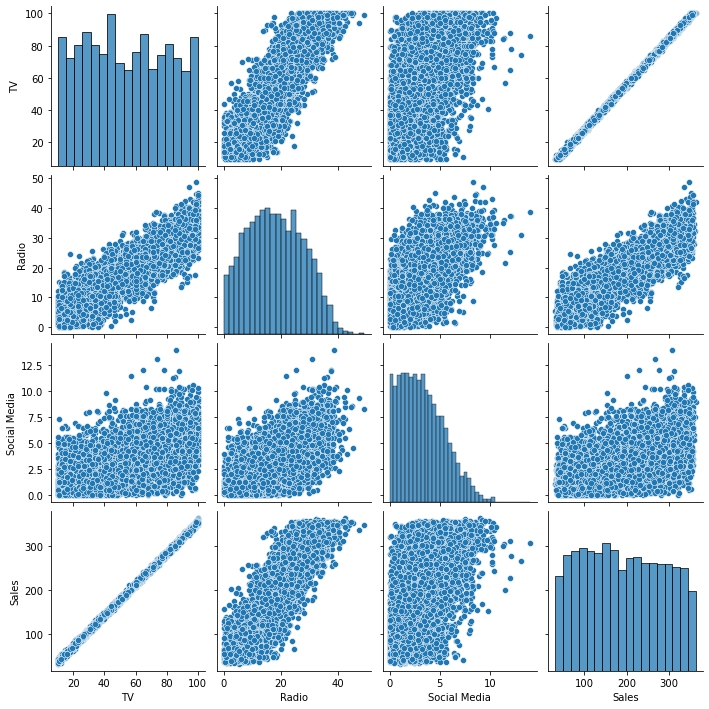

In [7]:
sns.pairplot(df)

C:\Users\ASHOK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

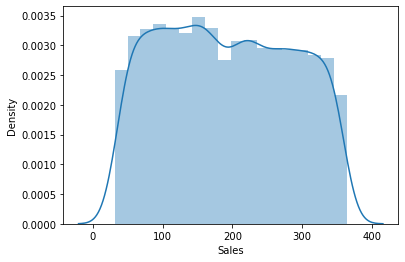

In [8]:
sns.distplot(df['Sales'])

In [9]:
#correlaion matrix
df.corr(method='pearson')

,TV,Radio,Social Media,Sales
TV,1.000000,0.869460,0.528168,0.999497
Radio,0.869460,1.000000,0.607452,0.869105
Social Media,0.528168,0.607452,1.000000,0.528906
Sales,0.999497,0.869105,0.528906,1.000000


<AxesSubplot:>

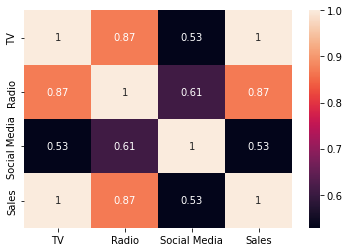

In [10]:
sns.heatmap(df.corr(),annot=True)

# Preprocessing

####  Filling Missing values

In [11]:
df.isnull().sum()

TV              10
Radio            4
Social Media     6
Influencer       0
Sales            6
dtype: int64

<AxesSubplot:ylabel='TV'>

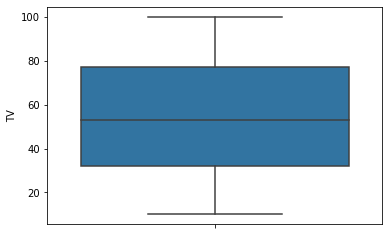

In [12]:
sns.boxplot(y='TV',data=df)

In [13]:
df['TV']=df['TV'].fillna(df['TV'].mean())

<AxesSubplot:ylabel='Radio'>

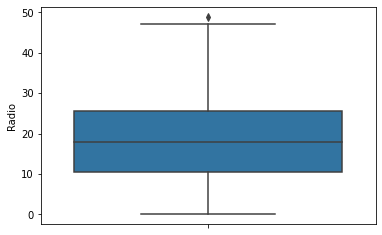

In [14]:
sns.boxplot(y='Radio',data=df)

In [15]:
df['Radio']=df['Radio'].fillna(df['Radio'].median())

<AxesSubplot:ylabel='Social Media'>

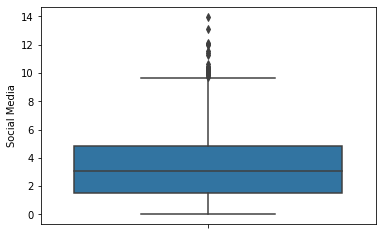

In [16]:
sns.boxplot(y='Social Media',data=df)

In [17]:
df['Social Media']=df['Social Media'].fillna(df['Social Media'].median())

<AxesSubplot:ylabel='Sales'>

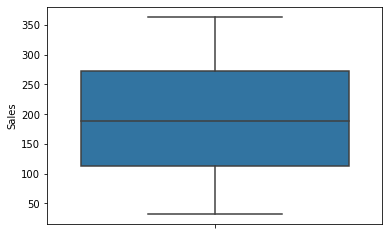

In [18]:
sns.boxplot(y='Sales',data=df)

In [19]:
df['Sales']=df['Sales'].fillna(df['Sales'].mean())

In [20]:
df.isnull().sum()

TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64

#### Encoding

In [21]:
#Label encoder
df["Influencer"]=df["Influencer"].astype('category')
df["Influencer"]=df["Influencer"].cat.codes


In [22]:
#onehot encoder
df=pd.get_dummies(df,columns=["Influencer"])


In [23]:
df.head()

,TV,Radio,Social Media,Sales,Influencer_0,Influencer_1,Influencer_2,Influencer_3
0,16.0,6.566231,2.907983,54.732757,0,1,0,0
1,13.0,9.237765,2.409567,46.677897,0,1,0,0
2,41.0,15.886446,2.913410,150.177829,0,1,0,0
3,83.0,30.020028,6.922304,298.246340,0,1,0,0
4,15.0,8.437408,1.405998,56.594181,0,0,1,0


In [24]:
#dummy variable
df=df.drop(['Influencer_0'],axis=1)

In [25]:
df.head()

,TV,Radio,Social Media,Sales,Influencer_1,Influencer_2,Influencer_3
0,16.0,6.566231,2.907983,54.732757,1,0,0
1,13.0,9.237765,2.409567,46.677897,1,0,0
2,41.0,15.886446,2.913410,150.177829,1,0,0
3,83.0,30.020028,6.922304,298.246340,1,0,0
4,15.0,8.437408,1.405998,56.594181,0,1,0


In [26]:
#splitting into dependent and independent variables
x=df.drop(['Sales'],axis=1)
y=df['Sales']

In [27]:
x.head()

,TV,Radio,Social Media,Influencer_1,Influencer_2,Influencer_3
0,16.0,6.566231,2.907983,1,0,0
1,13.0,9.237765,2.409567,1,0,0
2,41.0,15.886446,2.913410,1,0,0
3,83.0,30.020028,6.922304,1,0,0
4,15.0,8.437408,1.405998,0,1,0


In [28]:
y.head()

0     54.732757
1     46.677897
2    150.177829
3    298.246340
4     56.594181
Name: Sales, dtype: float64

#### Train Test Split


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.75,random_state=101)

In [31]:
print(xtrain.head())
print('')
print(ytrain.head())

        TV      Radio  Social Media  Influencer_1  Influencer_2  Influencer_3
4564  99.0  36.024174      4.288755             0             0             0
4402  21.0  14.659927      3.072567             0             0             0
4531  43.0  10.501272      0.545958             0             1             0
1538  89.0  18.426310      3.158669             0             0             0
3861  77.0  28.536922      3.714552             1             0             0

4564    355.807121
4402     71.926469
4531    153.887538
1538    316.314865
3861    271.690631
Name: Sales, dtype: float64


In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [34]:
lr.intercept_

-0.3242548162872083

In [35]:
lr.coef_

array([3.53575288, 0.06500451, 0.04646884, 0.69463567, 0.32285418,
       0.27561652])

In [36]:
coef_df = pd.DataFrame(lr.coef_, x.columns, columns=['Coeffiient'])
coef_df

,Coeffiient
TV,3.535753
Radio,0.065005
Social Media,0.046469
Influencer_1,0.694636
Influencer_2,0.322854
Influencer_3,0.275617


In [37]:
#testing prediction
y_prediction=lr.predict(xtest)
y_prediction

array([241.98006877, 296.12800252, 245.41355612, ..., 337.77961318,
       267.07183119, 117.85783947])

In [38]:
#training prediction
y_pred_train=lr.predict(xtrain)

In [39]:
#Error metrics
from sklearn import metrics

In [40]:
print('mse:',metrics.mean_squared_error(ytest,y_prediction))
print('rmse:',np.sqrt(metrics.mean_squared_error(ytest,y_prediction)))
print('mae:',metrics.mean_absolute_error(ytest,y_prediction))


mse: 113.92016341637182
rmse: 10.673338906657646
mae: 3.206196429849453


In [41]:
#R2 score-for testing dataset
metrics.r2_score(ytest,y_prediction)

0.9869091302630203

In [42]:
#R2 score for training dataset
metrics.r2_score(ytrain,y_pred_train)

0.9955154535782212

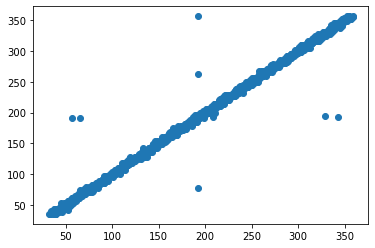

In [43]:
plt.scatter(ytest,y_prediction)